In [1]:
import pandas as pd
import numpy as np
import urllib
import os
import warnings
import sqlalchemy

# ููุชุจุงุช ุงูุฑุณู ุงูุจูุงูู (Visualization)
import matplotlib.pyplot as plt
import seaborn as sns

# ูุฅุฎูุงุก ุชุญุฐูุฑุงุช Pandas ุฃู ุบูุฑูุง
warnings.filterwarnings("ignore")

In [2]:
# --- 1. ุงูุฅุนุฏุงุฏุงุช / Configuration ---
server = 'youssefkhalid'
database = 'INSTANT22'
CHUNK_SIZE = 10000 
OUTPUT_FILE = 'fully_joined_transactions_data.csv' 

# --- 2. ุฅูุดุงุก ูุญุฑู SQLAlchemy ููุงุชุตุงู ---
params = urllib.parse.quote_plus(
    f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
)
try:
    engine = sqlalchemy.create_engine(f"mssql+pyodbc:///?odbc_connect={params}")
except Exception as e:
    print(f"โ ุฎุทุฃ ูู ุฅูุดุงุก ูุญุฑู ุงูุงุชุตุงู: {e}")
    # ุฅุฐุง ูุดู ุงูุงุชุตุงู ููุงุ ูุง ูููู ูุชุงุจุนุฉ ุงูููุฏ

# --- 3. ุงุณุชุนูุงู SQL ุงููุฏูุฌ (ุงูู JOIN) ---
query = """
SELECT
    t.*,
    u.per_capita_income,  
    u.yearly_income,
    u.credit_score,
    c.card_brand,
    c.card_type
FROM
    transactions AS t
LEFT JOIN
    UsersData AS u ON t.client_id = u.id
LEFT JOIN
    CardsData AS c ON t.card_id = c.id;
"""

# --- 4. ุฌูุจ ูุญูุธ ุงูุจูุงูุงุช ูุจุงุดุฑุฉู ูู ุฃุฌุฒุงุก ---
total_rows = 0
first_chunk = True

print(f"โ ุชู ุฅูุดุงุก ูุญุฑู ุงูุงุชุตุงู. ุจุฏุก ุฌูุจ ูุญูุธ ุงูุจูุงูุงุช ุฅูู {OUTPUT_FILE}...")

try:
    # ุงุณุชุฎุฏุงู engine ู chunksize ูุชุฏูู ุงูุจูุงูุงุช ุจุดูู ูุนุงู ููุจุงุดุฑ
    for i, chunk in enumerate(pd.read_sql(query, engine, chunksize=CHUNK_SIZE)):
        
        # ุงูุญูุธ ุงููุจุงุดุฑ ุนูู ุงููุฑุต ูุชุฌูุจ ููุงุฏ ุงูุฐุงูุฑุฉ
        mode = 'w' if first_chunk else 'a' # 'w' ูููุชุงุจุฉุ 'a' ููุฅุถุงูุฉ
        header = first_chunk # ูุชุงุจุฉ ุงูู Header ูู ุงูุฌุฒุก ุงูุฃูู ููุท
        
        chunk.to_csv(OUTPUT_FILE, index=False, mode=mode, header=header, encoding='utf-8')
            
        first_chunk = False 
        total_rows += len(chunk)
        print(f"   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู {i+1}. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: {total_rows}")

    print("\n" + "="*70)
    print(f"๐ ุงูุชูู ุงูุชุญููู! ุชู ุญูุธ ุฅุฌูุงูู {total_rows} ุตููุง ูุฏูุฌูุง ุจูุฌุงุญ ูู ุงูููู {OUTPUT_FILE}.")
    print("ุงูุขู ูููู ุจุฏุก ุงูุชุญููู.")
    print("="*70)

except Exception as e:
    print(f"\nโ ุญุฏุซ ุฎุทุฃ ุฃุซูุงุก ุฌูุจ ุงูุจูุงูุงุช: {e}")

finally:
    if 'engine' in locals() and engine:
        engine.dispose()

โ ุชู ุฅูุดุงุก ูุญุฑู ุงูุงุชุตุงู. ุจุฏุก ุฌูุจ ูุญูุธ ุงูุจูุงูุงุช ุฅูู fully_joined_transactions_data.csv...
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 10000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 2. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 20000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 3. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 30000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 4. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 40000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 5. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 50000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 6. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 60000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 7. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 70000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 8. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 8000

   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 123. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 1230000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 124. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 1240000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 125. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 1250000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 126. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 1260000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 127. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 1270000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 128. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 1280000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 129. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 1290000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 130. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 1300000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 131. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌู

   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 242. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 2420000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 243. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 2430000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 244. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 2440000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 245. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 2450000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 246. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 2460000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 247. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 2470000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 248. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 2480000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 249. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 2490000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 250. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌู

   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 361. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 3610000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 362. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 3620000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 363. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 3630000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 364. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 3640000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 365. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 3650000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 366. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 3660000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 367. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 3670000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 368. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 3680000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 369. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌู

   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 480. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 4800000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 481. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 4810000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 482. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 4820000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 483. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 4830000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 484. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 4840000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 485. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 4850000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 486. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 4860000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 487. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 4870000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 488. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌู

   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 599. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 5990000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 600. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 6000000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 601. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 6010000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 602. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 6020000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 603. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 6030000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 604. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 6040000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 605. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 6050000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 606. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 6060000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 607. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌู

   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 718. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 7180000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 719. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 7190000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 720. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 7200000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 721. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 7210000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 722. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 7220000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 723. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 7230000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 724. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 7240000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 725. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 7250000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 726. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌู

   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 837. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 8370000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 838. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 8380000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 839. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 8390000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 840. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 8400000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 841. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 8410000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 842. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 8420000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 843. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 8430000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 844. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 8440000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 845. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌู

   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 956. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 9560000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 957. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 9570000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 958. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 9580000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 959. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 9590000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 960. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 9600000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 961. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 9610000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 962. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 9620000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 963. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 9630000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 964. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌู

   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1073. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 10730000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1074. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 10740000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1075. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 10750000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1076. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 10760000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1077. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 10770000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1078. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 10780000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1079. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 10790000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1080. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 10800000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1081. ุนุฏุฏ ุงูุตููู ุงูุ

   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1189. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 11890000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1190. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 11900000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1191. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 11910000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1192. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 11920000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1193. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 11930000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1194. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 11940000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1195. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 11950000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1196. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 11960000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1197. ุนุฏุฏ ุงูุตููู ุงูุ

   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1305. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 13050000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1306. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 13060000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1307. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 13070000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1308. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 13080000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1309. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 13090000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1310. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 13100000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1311. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 13110000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1312. ุนุฏุฏ ุงูุตููู ุงูุญุงูู ุงูุฅุฌูุงูู: 13120000
   โถ๏ธ ุชู ุฌูุจ ูุญูุธ ุงูุฌุฒุก ุฑูู 1313. ุนุฏุฏ ุงูุตููู ุงูุ

In [1]:
# --- ุฅุนุฏุงุฏุงุช ุงูุชุญููู ---
OUTPUT_FILE = 'fully_joined_transactions_data.csv'
CHUNK_SIZE_ANALYSIS = 10000 
# ---------------------------------------------------

# =================================================================
# ุงูุฏุงูุฉ 1: ุชุญู ูุญู df_merged.info()
# =================================================================
def summarize_data_types(file_path):
    """Prints column names and inferred data types from the first chunk of the CSV."""
    if not os.path.exists(file_path):
        print(f"โ ุงูููู {file_path} ุบูุฑ ููุฌูุฏ. ูุง ูููู ุนุฑุถ ุงูููุฎุต.")
        return

    try:
        # ูุฑุงุกุฉ ุฃูู 5 ุตููู ููุท ููุญุตูู ุนูู ุงูููุฎุต
        df_head = pd.read_csv(file_path, nrows=5) 
        
        print("="*50)
        print(f"ููุฎุต ุงูุฃุนูุฏุฉ ูุฃููุงุน ุงูุจูุงูุงุช:")
        df_head.info(verbose=True, memory_usage=False) 
        print("="*50)
    except Exception as e:
        print(f"โ ูุดู ุนุฑุถ ุงูููุฎุต: {e}")


# =================================================================
# ุงูุฏุงูุฉ 2: ุชุญู ูุญู df_merged['col'].value_counts()
# =================================================================
def get_chunked_value_counts(file_path, column_name):
    """Calculates the true value counts across the entire large file."""
    if not os.path.exists(file_path):
        return pd.Series({"Error": "File not found."})

    counts_global = {} 
    
    for chunk in pd.read_csv(file_path, chunksize=CHUNK_SIZE_ANALYSIS):
        counts_chunk = chunk[column_name].value_counts().to_dict()
        
        for value, count in counts_chunk.items():
            counts_global[value] = counts_global.get(value, 0) + count

    return pd.Series(counts_global).sort_values(ascending=False)


# =================================================================
# ุงูุฏุงูุฉ 3: ุชุญู ูุญู df_merged['col'].mean()
# (ูุน ุชูุธูู ูุฑููุฒ ุงูุนููุฉ ูุซู '$' ู ',' )
# =================================================================
def get_chunked_numeric_analysis(file_path, column_name):
    """Calculates the sum and count for numeric columns after cleaning."""
    if not os.path.exists(file_path):
        return 0, 0, 0, 0

    total_sum = 0
    total_count = 0
    
    for chunk in pd.read_csv(file_path, chunksize=CHUNK_SIZE_ANALYSIS):
        
        # ุชูุธูู ุงูุนููุฏ ูู ุงูุฑููุฒ ูุชุญูููู ุฅูู ุฑููู
        numeric_col = (
            chunk[column_name]
            .astype(str)
            .str.replace(r'[$,]', '', regex=True) # ุฅุฒุงูุฉ ุฑููุฒ ุงูุนููุฉ ูุงููุงุตูุฉ
            .astype(float)
            .fillna(0) 
        )
        
        total_sum += numeric_col.sum()
        total_count += len(numeric_col)
        
    return total_sum, total_count


# =================================================================
# ุงูุฏุงูุฉ 4: ุชุญู ูุญู df_merged ูู ุงูุฑุณูู ุงูุจูุงููุฉ (ุนู ุทุฑูู ุฃุฎุฐ ุนููุฉ)
# =================================================================
def create_random_sample(file_path, sample_size=100000):
    """Loads a random sample of the massive file into memory for plotting/inspection."""
    print(f"\nโณ ุฌูุจ ุนููุฉ ุนุดูุงุฆูุฉ ุจุญุฌู {sample_size} ุตู...")
    
    # ูุฌุจ ุฃู ูููู ุจุชูุธูู ุงูุฏุฎู ุฃุซูุงุก ุงูุชุญููู ูุชุฌูุจ ุฃุฎุทุงุก ุงูุฑุณู
    converters_dict = {
        'yearly_income': lambda x: float(x.replace('$', '').replace(',', '') if isinstance(x, str) else x),
        # ููููู ุฅุถุงูุฉ ุฃุนูุฏุฉ ุฃุฎุฑู ููุง ุฅุฐุง ูุงูุช ุชุญุชุงุฌ ูุชูุธูู
    }
    
    # ูุฑุงุกุฉ ุนุฏุฏ ุงูุตููู ุงูููู
    n_rows = sum(1 for line in open(file_path)) - 1 
    
    # ุชุญุฏูุฏ ุงูุตููู ุงููุฑุงุฏ ุชุฎุทููุง ูุฅูุดุงุก ุนููุฉ ุนุดูุงุฆูุฉ
    skip_list = sorted(np.random.choice(n_rows, n_rows - sample_size, replace=False))
    
    # ุชุญููู ุงูุนููุฉ ูุน ุชุฎุทู ุงูุตููู ุบูุฑ ุงููุฑุบูุจ ูููุง ูุชุทุจูู ุงูุชูุธูู
    df_sample = pd.read_csv(file_path, skiprows=skip_list, header=0, converters=converters_dict)
    
    print(f"โ ุชู ุชุญููู ุงูุนููุฉ ุจูุฌุงุญ.")
    return df_sample

In [14]:
# 1. ุจุฏูุงู ูู df_merged.info()
summarize_data_types(OUTPUT_FILE)

# 2. ุจุฏูุงู ูู df_merged.use_chip.value_counts()
print("\n--- 1. Value Counts for 'use_chip' ---")
chip_counts = get_chunked_value_counts(OUTPUT_FILE, 'use_chip')
print(chip_counts)

# 3. ุชุญููู ุงูุนูุงูุฉ ุงูุชุฌุงุฑูุฉ ููุจุทุงูุฉ (card_brand)
print("\n--- 2. Top 5 Card Brands ---")
brand_counts = get_chunked_value_counts(OUTPUT_FILE, 'card_brand')
print(brand_counts.head(5))

# 4. ุจุฏูุงู ูู df_merged.yearly_income.mean()
total_sum, total_count = get_chunked_numeric_analysis(OUTPUT_FILE, 'yearly_income')

if total_count > 0:
    avg_income = total_sum / total_count
    print(f"\n--- 3. Numerical Analysis ---")
    print(f"ุฅุฌูุงูู ุงูุตููู ุงูุชู ุชู ุชุญููููุง: {total_count}")
    print(f"ูุชูุณุท ุงูุฏุฎู ุงูุณููู ุงูุฅุฌูุงูู: {avg_income:.2f}")
else:
    print("\nูุง ุชูุฌุฏ ุจูุงูุงุช ุฑูููุฉ ูุชุงุญุฉ.")

ููุฎุต ุงูุฃุนูุฏุฉ ูุฃููุงุน ุงูุจูุงูุงุช:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5 non-null      int64 
 1   date               5 non-null      object
 2   client_id          5 non-null      int64 
 3   card_id            5 non-null      int64 
 4   amount             5 non-null      object
 5   use_chip           5 non-null      object
 6   merchant_name      5 non-null      int64 
 7   merchant_zip       5 non-null      object
 8   mcc                4 non-null      object
 9   errors             5 non-null      object
 10  per_capita_income  5 non-null      object
 11  yearly_income      5 non-null      object
 12  credit_score       5 non-null      int64 
 13  card_brand         5 non-null      object
 14  card_type          5 non-null      object
dtypes: int64(5), object(10)=================

In [15]:
# =================================================================
# ุงูุฏุงูุฉ 4: ุชุญู ูุญู df_merged ูู ุงูุฑุณูู ุงูุจูุงููุฉ (ุนู ุทุฑูู ุฃุฎุฐ ุนููุฉ)
# =================================================================
def create_random_sample(file_path, sample_size=100000):
    """Loads a random sample of the massive file into memory for plotting/inspection."""
    print(f"\nโณ ุฌูุจ ุนููุฉ ุนุดูุงุฆูุฉ ุจุญุฌู {sample_size} ุตู...")
    
    converters_dict = {
        'yearly_income': lambda x: float(x.replace('$', '').replace(',', '') if isinstance(x, str) else x) if x and isinstance(x, str) else x,
    }

    # ๐จ ุงููุงุฆูุฉ ุงูููุงุฆูุฉ ูุงูููุธูุฉ ูุฃุณูุงุก ุงูุฃุนูุฏุฉ (ุญู ูุดููุฉ skiprows/header) ๐จ
    FINAL_COLUMNS = [
        'id', 'date', 'client_id', 'card_id', 'amount', 'use_chip', 
        'merchant_name', 'merchant_zip', 'mcc', 'errors', 
        'per_capita_income', 'yearly_income', 'credit_score', 
        'card_brand', 'card_type'
    ]

    try:
        n_total_lines = sum(1 for line in open(file_path)) 
        n_data_rows = n_total_lines - 1
    except FileNotFoundError:
        print(f"โ ุงูููู {file_path} ุบูุฑ ููุฌูุฏ.")
        return pd.DataFrame()

    # ุชุญุฏูุฏ ุงูุตููู ุงููุฑุงุฏ ุงูุงุญุชูุงุธ ุจูุง ุนุดูุงุฆูุงู (ุจุงุณุชุซูุงุก ุตู ุงูุฑุฃุณ 0)
    rows_to_keep = np.random.choice(np.arange(1, n_total_lines), size=sample_size, replace=False)
    all_rows = np.arange(1, n_total_lines)
    skip_rows_data_indices = np.setdiff1d(all_rows, rows_to_keep)
    
    # ูุงุฆูุฉ ุจุฌููุน ุงูุตููู ุงูุชู ุณูุชู ุชุฎุทููุง (ุจูุง ูู ุฐูู ุตู ุงูุฑุฃุณ 0)
    skip_list = [0] + skip_rows_data_indices.tolist()

    # ุชุญููู ุงูุนููุฉ: ูุณุชุฎุฏู names ูุชุญุฏูุฏ ุงูุฃุนูุฏุฉ ุจุดูู ุตุฑูุญ ูุถูุงู ุงูุชูุงุณู
    df_sample = pd.read_csv(
        file_path, 
        skiprows=skip_list, 
        header=None, # ูุง ููุฑุฃ ุตู ุงูุฑุฃุณ ูู ุงูููู
        names=FINAL_COLUMNS, # ูุณุชุฎุฏู ุงูุฃุณูุงุก ุงูุตุญูุญุฉ ุงูุชู ูููุง ุจุชุนุฑูููุง
        converters=converters_dict
    )

    # ุชูุธูู ุฃุณูุงุก ุงูุฃุนูุฏุฉ (ูุฎุทูุฉ ุญูุงูุฉ ุฅุถุงููุฉ)
    df_sample.columns = df_sample.columns.str.lower().str.strip().str.replace(' ', '_')
    
    print(f"โ ุชู ุชุญููู ุงูุนููุฉ ุจูุฌุงุญ. ุญุฌู ุงูุนููุฉ: {len(df_sample)} ุตู.")
    return df_sample

In [16]:
# ุจุฏูุงู ูู ุงูููุฏ ุงูุฃุตูู
print("\n--- 1. Value Counts for 'use_chip' ---")
chip_counts = get_chunked_value_counts(OUTPUT_FILE, 'use_chip')
print(chip_counts) # โฌ๏ธ ุฃุถููุง ูุฐุง ุงูุณุทุฑ


--- 1. Value Counts for 'use_chip' ---
Swipe Transaction     6967185
Chip Transaction      4780818
Online Transaction    1557912
dtype: int64


In [17]:
# 1. ุชุญููู ุงูุนูุงูุฉ ุงูุชุฌุงุฑูุฉ ููุจุทุงูุฉ (card_brand)
print("\n--- 2. Top 5 Card Brands ---")
brand_counts = get_chunked_value_counts(OUTPUT_FILE, 'card_brand')
print(brand_counts.head(5))

# 2. ุชุญููู ุงูุฏุฎู ุงูุณููู (ุจุฏูุงู ูู df_merged.yearly_income.mean())
total_sum, total_count = get_chunked_numeric_analysis(OUTPUT_FILE, 'yearly_income')

if total_count > 0:
    avg_income = total_sum / total_count
    print(f"\n--- 3. Numerical Analysis ---")
    print(f"ุฅุฌูุงูู ุงูุตููู ุงูุชู ุชู ุชุญููููุง: {total_count}")
    print(f"ูุชูุณุท ุงูุฏุฎู ุงูุณููู ุงูุฅุฌูุงูู: {avg_income:.2f}")
else:
    print("\nูุง ุชูุฌุฏ ุจูุงูุงุช ุฑูููุฉ ูุชุงุญุฉ.")


--- 2. Top 5 Card Brands ---
Mastercard    7157399
Visa          4957563
Amex           854490
Discover       336463
dtype: int64

--- 3. Numerical Analysis ---
ุฅุฌูุงูู ุงูุตููู ุงูุชู ุชู ุชุญููููุง: 13305915
ูุชูุณุท ุงูุฏุฎู ุงูุณููู ุงูุฅุฌูุงูู: 46683.69



โณ ุฌูุจ ุนููุฉ ุนุดูุงุฆูุฉ ุจุญุฌู 100000 ุตู...
โ ุชู ุชุญููู ุงูุนููุฉ ุจูุฌุงุญ. ุญุฌู ุงูุนููุฉ: 100000 ุตู.


<Figure size 1000x600 with 0 Axes>

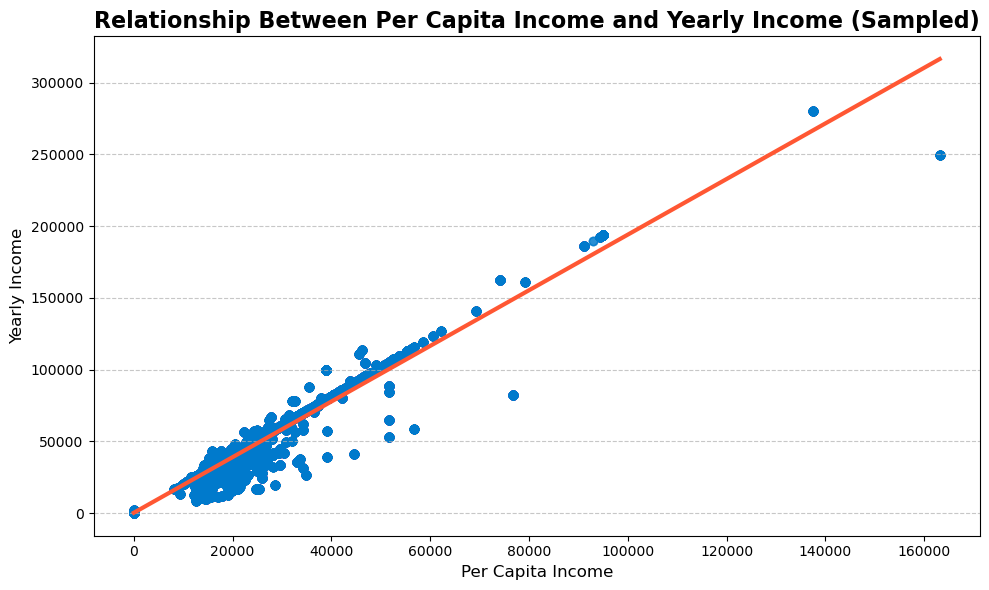

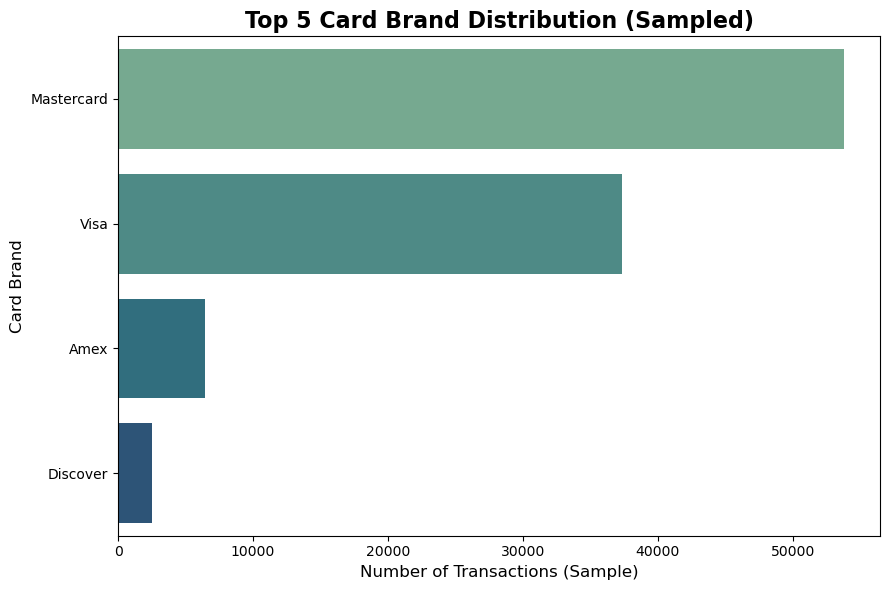

In [20]:
# ุฌูุจ ุนููุฉ ุนุดูุงุฆูุฉ ุตุบูุฑุฉ ููุฑุณู
# ุฌูุจ ุนููุฉ ุนุดูุงุฆูุฉ ุตุบูุฑุฉ ููุฑุณู
df_sample = create_random_sample(OUTPUT_FILE, sample_size=100000)

if not df_sample.empty:
    
    # ๐จ๐จ ุงูุญู ุงูููุงุฆู ูู UFuncTypeError ๐จ๐จ
    # ุชูุธูู 'per_capita_income' ูู ุฃู ุฑููุฒ ูุชุญูููู ุฅูู ุฑููู
    df_sample['per_capita_income'] = (
        df_sample['per_capita_income']
        .astype(str)
        .str.replace(r'[$,]', '', regex=True) # ุฅุฒุงูุฉ ุฑููุฒ ุงูุนููุฉ ูุงูููุงุตู
        .astype(float)
    )
    # ----------------------------------------
    
    # 1. ุงูุฑุณู ุงูุจูุงูู ูุนูุงูุฉ ุงูุฏุฎู ูููุฑุฏ ูุงูุฏุฎู ุงูุณููู (RegPlot)
    plt.figure(figsize=(10, 6))
    
    # ... (ุจุงูู ููุฏ sns.regplot ู sns.countplot) ...
    # ุชุญุฏูุฏ ุงูุงุณู ุงูุตุญูุญ ููุนููุฏ
    # ุจูุง ุฃููุง ูููุง ุจุชูุธูููุง ูุณุจูุงูุ ููุชุฑุถ ุฃู ูููู ุงูุงุณู 'per_capita_income'
    # ุฅุฐุง ุธูุฑ ุงุณู ูุฎุชูู ูู ุงูุทุจุงุนุฉ ุฃุนูุงูุ ุณูุณุชุฎุฏูู
    
    # 1. ุงูุฑุณู ุงูุจูุงูู ูุนูุงูุฉ ุงูุฏุฎู ูููุฑุฏ ูุงูุฏุฎู ุงูุณููู (RegPlot)
    plt.figure(figsize=(10, 6))

    # ูุณุชุฎุฏู ุงูุงุณู ุงููุธูู ุงูุฐู ููุชุฑุถ ุฃู ูููู ููุฌูุฏุงู
    sns.regplot(
        x='per_capita_income', 
        y='yearly_income', 
        data=df_sample, 
        scatter_kws={'alpha': 0.3, 'color': '#007ACC'}, 
        line_kws={'color': '#FF5733', 'linewidth': 3}, 
        ci=None
    )

    plt.title("Relationship Between Per Capita Income and Yearly Income (Sampled)", fontsize=16, fontweight='bold')
    plt.xlabel("Per Capita Income", fontsize=12)
    plt.ylabel("Yearly Income", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # 2. ุฑุณู ุชูุฒูุน ุงูุนูุงูุงุช ุงูุชุฌุงุฑูุฉ ููุจุทุงูุงุช (CountPlot)
    plt.figure(figsize=(9, 6))
    sns.countplot(y='card_brand', data=df_sample, 
                  order=df_sample['card_brand'].value_counts().index[:5], 
                  palette='crest')
    
    plt.title('Top 5 Card Brand Distribution (Sampled)', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Transactions (Sample)', fontsize=12)
    plt.ylabel('Card Brand', fontsize=12)
    plt.tight_layout()
    plt.show()

In [23]:
import os

# ูุชุบูุฑ ุนุงููู ูุญูู ุงุณู ุงูููู ุงูุฐู ุชู ุญูุธู ุฃุซูุงุก ูุฑุญูุฉ ุงูู Chunking
OUTPUT_FILE = 'fully_joined_transactions_data.csv' 
NEW_FILE_NAME = "new_transactions_data.csv"

# ุงูุชุญูู ูู ูุฌูุฏ ุงูููู ุงูุฃุตูู ูุฅุนุงุฏุฉ ุชุณููุชู
if os.path.exists(OUTPUT_FILE):
    os.rename(OUTPUT_FILE, NEW_FILE_NAME)
    print(f"โ ุชู ุฅุนุงุฏ ุชุณููุฉ ุงูููู ุจูุฌุงุญ ูู {OUTPUT_FILE} ุฅูู {NEW_FILE_NAME}.")
else:
    print(f"โ ุงูููู ุงูุฃุตูู ({OUTPUT_FILE}) ุบูุฑ ููุฌูุฏ. ุชุฃูุฏ ูู ุชุดุบูู ูุฑุญูุฉ ุงูุชุญููู ุฃููุงู.")

โ ุชู ุฅุนุงุฏุฉ ุชุณููุฉ ุงูููู ุจูุฌุงุญ ูู fully_joined_transactions_data.csv ุฅูู new_transactions_data.csv.
